In [1]:
from __future__ import print_function
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
v = 20. #velocity in miles per hour
d = 20 #distance in blocks
idle = 2. #max wait time at street light in minutes
l = 0.2 #mean block length in miles

In [3]:
t = 0
for b in range(d):
    toss = np.random.randint(0,2)
    t += np.abs(v * l * np.random.randn() + 1)
    if toss:
        t += idle * np.random.rand()        

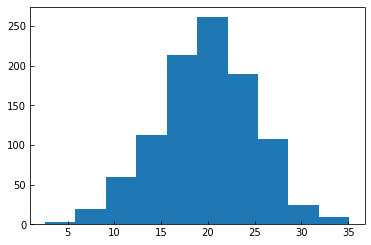

In [4]:
tmp  = 5. * np.random.randn(1000) + v
pl.hist(tmp);

In [5]:

def trip(d, v, l, t):
    for b in range(d):
        toss = np.random.randint(0,2)
        t += np.abs(l / (0.2 * (np.random.randn() + v))) / 60.
        #print (b, t, toss)
        if toss:
            t += idle * np.random.rand()  
    return t

In [6]:
t = 0
print ("it takes", trip(d, v, l, t), "minutes to go 20 blocks")

it takes 7.2699469073 minutes to go 20 blocks


In [22]:
t = 0
def trip(d, v, l, t, vsigma = 5, plot=False):
    if plot:
        ax, y = plot
    for b in range(d):
        toss = np.random.randint(0,2)
        
        # the velocity in each block will be the mean velocity perturbed by a gaussian
        vb = vsigma * np.random.randn() + v
        t += np.abs(l / vb) / 60.
        
        # the probability of hitting a red light is uniform (a coin toss)
        if toss:
            t += idle * np.random.rand()
            
        # the amount of time waiting  at the red light is stockastic following a 
        # uniform distribution between 0 and the duration of the street light
        if plot:
            alpha = min((vb - v + vsigma * 1.5) / (vsigma * 3), 1)
            alpha = max(alpha, 0)
            ax.plot([b, b + 1], [y, y], '-', color = pl.cm.coolwarm(alpha),
                   lw = 5)
    return t

9.1286824122899741

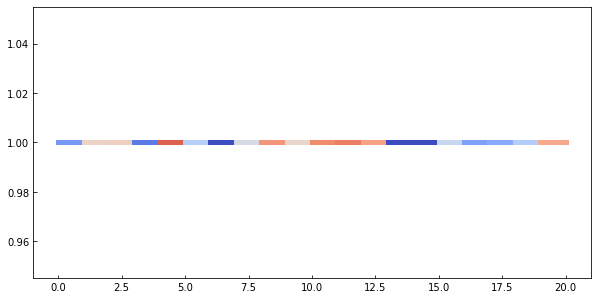

In [23]:
ax = pl.figure(figsize=(10,5)).add_subplot(111)
trip(d, v, l, t, plot=(ax, 1))

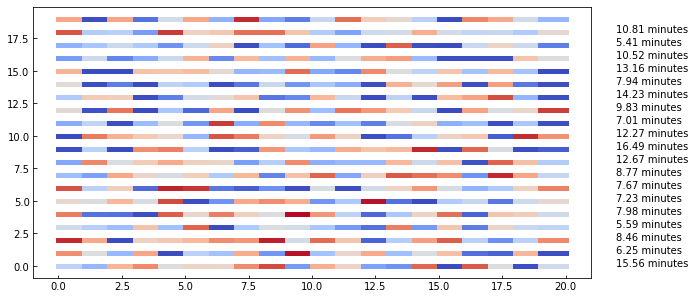

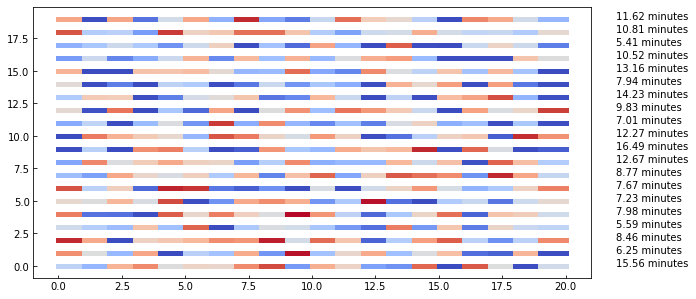

In [24]:
from IPython import display
ts = []
ax = pl.figure(figsize=(10,5)).add_subplot(111)
for n in range(20):
    ts.append(trip(d, v, l, t, plot=(ax, n)))
    display.clear_output(wait=True)
    display.display(pl.gcf())
    pl.text(22, n, "%.2f minutes"%ts[-1])

Trip duration mean 9.97, standard deviation 3.21


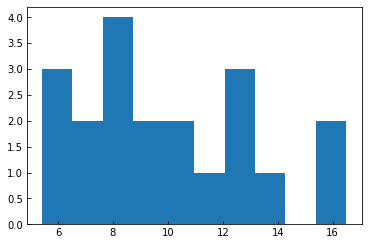

In [25]:
print ("Trip duration mean %.2f, standard deviation %.2f"%(pl.mean(np.array(ts)), 
                                                            pl.mean(np.std(ts))))
pl.hist(ts);

Trip duration mean 10.00, standard deviation 2.84


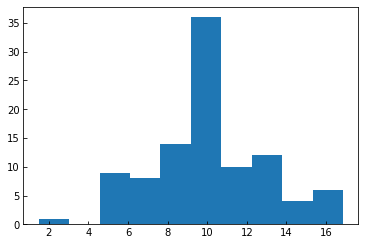

In [26]:
ts = []
for n in range(100):
    ts.append(trip(d, v, l, t))
print ("Trip duration mean %.2f, standard deviation %.2f"%(pl.mean(np.array(ts)), 
                                                            pl.mean(np.std(ts))))
pl.hist(ts);

Trip duration mean 9.94, standard deviation 2.96


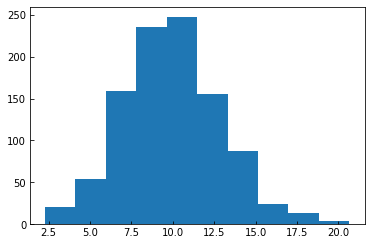

In [27]:
ts = []
for n in range(1000):
    ts.append(trip(d, v, l, t))
print ("Trip duration mean %.2f, standard deviation %.2f"%(pl.mean(np.array(ts)), 
                                                            pl.mean(np.std(ts))))
pl.hist(ts);

Trip duration mean 9.98, standard deviation 2.90


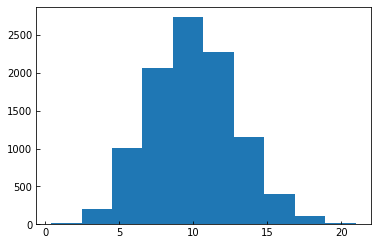

In [28]:
ts = []
for n in range(10000):
    ts.append(trip(d, v, l, t))
print ("Trip duration mean %.2f, standard deviation %.2f"%(pl.mean(np.array(ts)), 
                                                            pl.mean(np.std(ts))))
pl.hist(ts);

Trip duration mean 10.15, standard deviation 2.87


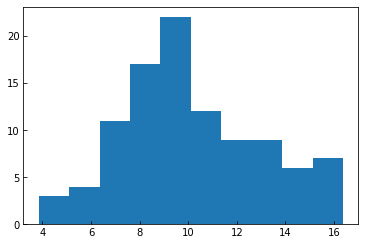

In [21]:
ts = []
for n in range(100):
    ts.append(trip(d, v, l, t, vsigma=15))
print ("Trip duration mean %.2f, standard deviation %.2f"%(pl.mean(np.array(ts)), 
                                                            pl.mean(np.std(ts))))
pl.hist(ts);